# Lab 1 : PAC Learnability, Hypothesis, Regression

---


Total Points: **90**

Tentative Weightage : **9%**

Submission Deadline :  **$13^{th}$ Feburary 2023 , 10:00 AM** (3 weeks)

Submit a separate report to mention any observations asked in the corresponding questions. Without these observations, no points will be provided for the corresponding question.
---



General Instructions:

---



1. You have to do this lab individually
2. You may use **seaborn, matplotlib, pandas, numpy, csv**
3. All the code should be submitted in the form of a single Jupyter notebook itself.
4. Points for each sub-section are mentioned in the appropriate question.
5. You can use Google colab to run a jupyter notebook (https://colab.research.google.com/) How to load data in Google Colab ?(https://towardsdatascience.com/3-ways-to-load-csv-files-into-colab-7c14fcbdcb92) (https://www.marktechpost.com/2019/06/07/how-to-connect-google-colab-with-google-drive/). You can also run it in your local anaconda jupyter notebook.
6. The lab must be submitted on Google classroom. The code as well as the accompanying observations (report pdf) should be made part of the assignment.
7. **Code Readability** is very important. Modularize your code by making use of classes, functions that can be flexibly reused wherever necessary. Also use self explanatory variable names and add comments to describe your approach wherever necessary. You may add additional code or text blocks as necessary.
8. You are expected to submit your **observations** (preferably in a separate pdf file) and not just an error free code.
9. Students are expected to follow the **honor code** of the class.
10. The deadline is strict and any assignment submitted later will not
be consider for evaluation unless you take prior permission (at least 4 days before the submission deadline).
11. The marks will be given on the basis of quality of code, use of innovative data structures, scalability, correctness, and completeness of the reported observation.
12. In case of any queries regarding Lab 1, please mail the TAs (emails are provided on the google classroom).

**Best Wishes**


**TASK 1**:                                                      **(18 Marks)**

Create a dataset $\mathcal{D} = (x_i,y_i)_{i=1}^N$ where each $x_i$ is a point in one dimension and each $y_i$ is a binary label i.e. $y_i = \{0,1\}$. First generate the vector $Y$ where each example will take $y_i = 1$ with probability $1/2$ and $y_i = 0$ with probability $1/2$ with $N = 30$. Now fixing the $y_i$, sample the $X$ matrix as follows: 


1. If $y_i = 1$ then $x_i \sim \mathcal{N}(3,1)$ where $\mathcal{N}(a,b)$ represent the gaussian distribution with mean $a$ and standard deviation $b$.
    
2. If $y_i = 0$ then $x_i \sim \mathcal{N}(9,1)$. 
   
  
Implement the following with respect to the above generated dataset:

1. Color code the examples with $y_i = 1$ as red and $y_i=0$ as green and plot the dataset.  **[3 Marks]**
2. Find a threshold hypothesis when hypothesis class is considered as all possible threshold classifier. Plot both the obtained hypothesis along with the dataset.  **[5 Marks]**
3. What is generalization error for the above distribution with respect to best threshold hypothesis $\theta^*$. Plot the empirical error against different value of $N$. Mention what minimum value of $N$ is required to reach $\theta^*$  **[10 Marks]**


Write your code by creating cells below.


In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
dataset1 = np.random.binomial(n=1,p=0.5,size=[30])
print(dataset1)

[0 1 1 1 0 0 1 1 0 1 0 1 1 1 1 1 0 1 1 0 1 0 1 0 1 0 0 1 0 0]


In [ ]:
x_array = []
for i in dataset1:
  if i==1:
    x_array.append(np.random.normal(loc = 3, scale = 1))
  else:
    x_array.append(np.random.normal(loc = 9, scale = 1))

print(x_array)


[7.932550792937183, 1.4580483443526815, 2.1795540794850723, 2.591468023017504, 6.785100821700986, 9.079533557227647, 4.106028579594619, 2.975221150264353, 9.312992033541285, 2.882350186361806, 6.70376510891069, 2.285154673268034, 3.0136288622510636, 2.5170474809029235, 3.0783030634645887, 2.4464074526371777, 9.00967488430945, 2.2430657725547247, 3.751553806926346, 10.381724262868591, 3.0467362152985156, 9.477638858466815, 1.736864791899548, 9.415385548256875, 1.6333785885849221, 11.068755038319715, 7.883727569409789, 1.0480217631323043, 7.542865843204769, 10.157360636783014]


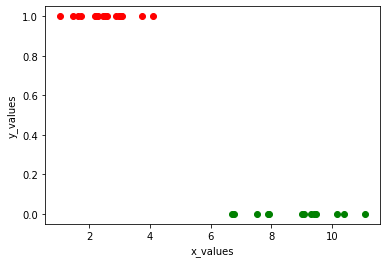

In [ ]:
col = []
for i in range(30):
  if dataset1[i]==1:
    col.append('red')
  else:
    col.append('green')

for i in range(30):
  plt.scatter(x_array[i],dataset1[i],c=col[i])

plt.xlabel('x_values')
plt.ylabel('y_values')
plt.show()

In [ ]:
def error_in_hypothesis(x_array,y_array,threshold):
  error = 0
  n = len(x_array)
  for i in range(n):
    if x_array[i]<threshold:
      if y_array[i]==0:
        error+=1
    elif x_array[i]>threshold:
      if y_array[i]==1:
        error+=1
  
  return error

threshold value =  6.548021763132304

error =  0


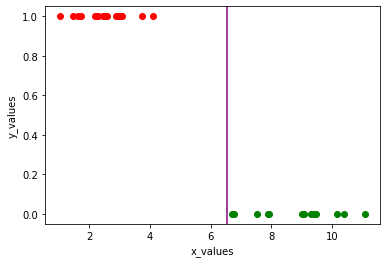

In [ ]:
x2 = np.arange(min(x_array),max(x_array),step = 0.5)
error = 30
threshold_value=0
for i in x2:
  threshold = i;
  err = error_in_hypothesis(x_array,dataset1,threshold)
  if err<=error:
    error = err
    threshold_value = threshold

print('threshold value = ',threshold_value)
print('\nerror = ', error)
for i in range(30):
  plt.scatter(x_array[i],dataset1[i],c=col[i])

plt.xlabel('x_values')
plt.ylabel('y_values')
plt.axvline(x=threshold_value, color = 'purple', label = 'threshold line')

In [ ]:
import scipy.stats
pos_inf = float('inf')
neg_inf = float('-inf')
prob1 = 1-scipy.stats.norm(3,1).cdf(threshold_value)
prob2 = scipy.stats.norm(9,1).cdf(threshold_value)
print('Generalization error = ', prob1+prob2)

Generalization error =  0.007297730795207487


In [ ]:
def threshold_classifier(X, threshold):
  pred=[]
  for x in X:
    if x<=threshold:
      pred.append(1)
    else:
      pred.append(0)
  return pred

Text(0.5, 0, 'Values of N')

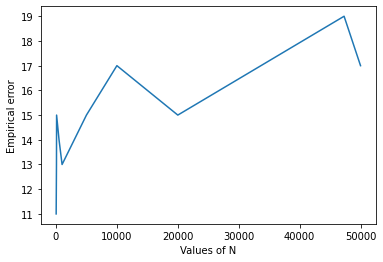

In [ ]:
emp_errors=[]
Ns = [30,80,100,500,1000,5000,10000,20000,47300,50000]
for N in [30,80,100,500,1000,5000,10000,20000,47300,50000]:
  dataset = np.random.binomial(n=1,p=0.5,size=[N])
  x_array = []
  for i in dataset1:
    if i==1:
      x_array.append(np.random.normal(loc = 3, scale = 1))
    else:
      x_array.append(np.random.normal(loc = 9, scale = 1))
  error_for_n = error_in_hypothesis(x_array,dataset,threshold_value)
  emp_errors.append(error_for_n)

plt.plot(Ns,emp_errors)
plt.ylabel('Empirical error')
plt.xlabel('Values of N')

In [ ]:
#Write your code here

In [ ]:
#write your code here You can create more cells

**TASK 2**:                                                      **(35 Marks)**

In this question, we will repeat the experiments discussed in the class with respect to polynomial regression but with a different function. 

Generate $20$ data points from function $f(x) = e^{(\pi x/8)} + \frac{x}{12\pi} + \text{noise}$ where noise$\sim \mathcal{N}(0,0.004)$ with $x$ ranging from $0$ to $10$.  **[3 Marks]**

1. Fit a polynomial regression with optimal weight vector $w^*$ computed via analytical method (using idea of matrices taught in class) and plot the curves for different degree of polynomials $M=2,4,5,7,10$. Explain your observations by plotting the data points generated and the curve obtained for different values of $M$.  **[10 Marks]**

2. Fit a polynomial regression using gradient descent for different degree of polynomials $M=2,4,5,7,10$. Explain your observations by plotting the data points generated and the curve obtained for different values of $M$.  **[10 Marks]**

3. Repeat the previous experiments with more number of data points and report your findings. More specifically, compare the above two approaches with respect to the solution obtained with respect to each value of M **[6 Marks]**

4. Plot runtime of both methods against variation with respect to $M$.
 **[3 Marks]**

5. Plot runtime of both methods against variation with respect to number of datapoints.  **[3 Marks]**

**Use of sci-kit or any direct implementation of linear regression is striclty probhibted. You can use numpy and pandas.**
Write your code by creating cells below.


In [ ]:
#write your code here You can create more cells
import math
import timeit

In [ ]:
#x2 = np.arange(0,10,step = 0.5)
#x2 = np.random.random(20)*10
x2 = np.linspace(0,10,num=20)
fx = []
i = 1
for x in x2:
  noise  = np.random.normal(0,0.2)
  y = np.sin(x*np.pi/8) + x/(12*np.pi) + noise
  fx.append(y)
  print('i = ',i,' x = ',x, ', f(x) = ',y)
  i+=1

i =  1  x =  0.0 , f(x) =  0.06800822268599908
i =  2  x =  0.5263157894736842 , f(x) =  0.1231644986473334
i =  3  x =  1.0526315789473684 , f(x) =  0.46000245203344103
i =  4  x =  1.5789473684210527 , f(x) =  0.5534274542531193
i =  5  x =  2.1052631578947367 , f(x) =  0.38783635365838964
i =  6  x =  2.631578947368421 , f(x) =  1.3877222113767882
i =  7  x =  3.1578947368421053 , f(x) =  0.9516965459180983
i =  8  x =  3.6842105263157894 , f(x) =  1.1855683327593147
i =  9  x =  4.2105263157894735 , f(x) =  1.018294031306942
i =  10  x =  4.7368421052631575 , f(x) =  1.1641227486985113
i =  11  x =  5.263157894736842 , f(x) =  0.6805421327347204
i =  12  x =  5.789473684210526 , f(x) =  0.8980478399992934
i =  13  x =  6.315789473684211 , f(x) =  0.4575233715043542
i =  14  x =  6.842105263157895 , f(x) =  0.7856482787115502
i =  15  x =  7.368421052631579 , f(x) =  0.23134938490216783
i =  16  x =  7.894736842105263 , f(x) =  0.28117854503909967
i =  17  x =  8.421052631578947 , f

In [ ]:
def printPoly(coeff):
    s = []
    first = True
    PLUS = ' + '
    MINUS = ' - '
    for Pi in range(len(coeff)-1, -1, -1):
        Ci = coeff[Pi]
        if 0 == Ci:
            if 0 == Pi and first:
                s.append('0')
            continue
        if Ci < 0:
            sign = MINUS
            Ci = -Ci
        else:
            sign = PLUS
        if first:
            first = False
            sign = '-' if MINUS == sign else ''
        s.append(sign)
        if 1 != Ci or 0 == Pi:
            s.append(str(Ci))
        if 0 < Pi:
            s.append('x')
            if 1 < Pi:
                s.append('^')
                s.append(str(Pi))
    print('y = ',end=" ")
    print(''.join(s))

In [ ]:
M = [2,4,5,7,10]
w_opt = []
run_time=[]
for m in M:
  start = timeit.default_timer()
  gxm = []
  wm = []
  i=0
  for x in x2:
    row = []
    for i in range(m+1):
      fix = pow(x,i)
      row.append(fix)
    gxm.append(row)
  gxm = np.array(gxm)
  wm = np.linalg.inv(gxm.transpose().dot(gxm)).dot(gxm.transpose().dot(fx))
  stop = timeit.default_timer()
  print('\nFor M = ',m,', the curve is : ')
  printPoly(wm)
  print('\nTime taken = ',stop-start)
  run_time.append(stop-start)
  w_opt.append(wm)


For M =  2 , the curve is : 
y =  -0.049165283860526016x^2 + 0.4257885109500714x + 0.0576512945218719

Time taken =  0.007093574000009539

For M =  4 , the curve is : 
y =  0.0001831715581066557x^4 - 0.0006312078769953322x^3 - 0.07147493027779794x^2 + 0.5545367068002016x - 0.052182775718220276

Time taken =  0.00036000799991597887

For M =  5 , the curve is : 
y =  -0.0005577814241362888x^5 + 0.01412770716151357x^4 - 0.12320921244249661x^3 + 0.37274157786382034x^2 - 0.021495903235290825x + 0.07255033989375903

Time taken =  0.00033313899984932505

For M =  7 , the curve is : 
y =  3.305294637701017e-05x^7 - 0.0011229357994047007x^6 + 0.014351457927148203x^5 - 0.08335708313688883x^4 + 0.20072521802649135x^3 - 0.13049780153869506x^2 + 0.2559575628888524x + 0.060430499160929685

Time taken =  0.00039254800003618584

For M =  10 , the curve is : 
y =  3.908103293426279e-06x^10 - 0.00019259179657638015x^9 + 0.0040299062438862165x^8 - 0.046607123367721215x^7 + 0.324747531209141x^6 - 1.39323

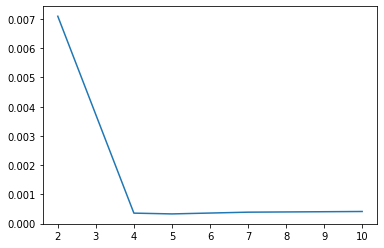

In [ ]:
plt.plot(M,run_time)

In [ ]:
def PolyCoeff(x,coeffs):
  l = len(coeffs)
  y=[]
  for j in x:
    fj = 0;
    for i in range(l):
      fj+=coeffs[i]*pow(j,i)
    y.append(fj)
  return y

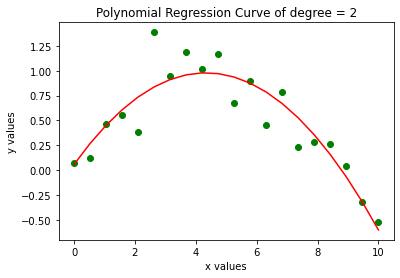

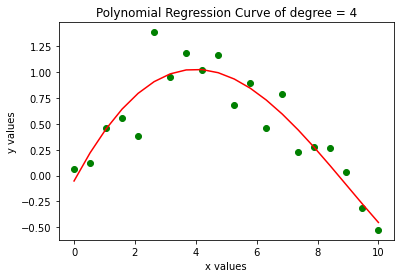

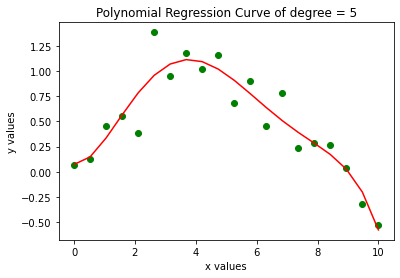

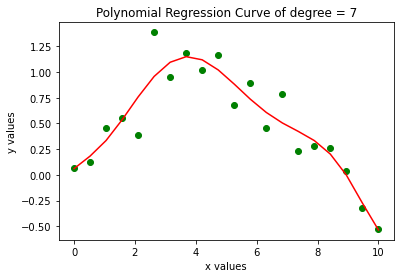

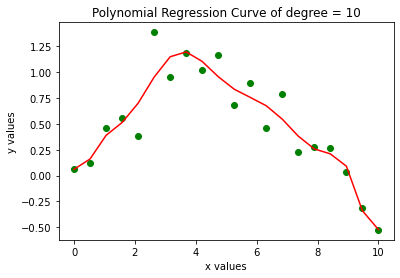

In [ ]:
i=0

for w in w_opt:
  coeffs = w
  y = PolyCoeff(x2,coeffs)
  #y = np.array([np.sum(np.array([coeffs[i]*(j**i) for i in range(len(coeffs)) for j in x2]))])

  plt.scatter(x2,fx,c = 'green')
  plt.plot(x2,y, c = 'red')
  plt.xlabel('x values')
  plt.ylabel('y values')
  plt.title('Polynomial Regression Curve of degree = %i' %M[i])
  i+=1
  plt.show()

In [ ]:
import statistics

In [ ]:
X = np.linspace(0,10,num=20)
Y = []
for x in X:
  y = np.sin(x*np.pi/8) + x/(12*np.pi) + np.random.normal(0,0.2)
  Y.append(y) 
print(X)
print(Y)

[ 0.          0.52631579  1.05263158  1.57894737  2.10526316  2.63157895
  3.15789474  3.68421053  4.21052632  4.73684211  5.26315789  5.78947368
  6.31578947  6.84210526  7.36842105  7.89473684  8.42105263  8.94736842
  9.47368421 10.        ]
[0.5081378377117686, 0.3047935370012985, 0.3770120394204657, 0.6651865639145785, 0.8663942864680807, 1.1269407989254896, 1.053279868813199, 1.2466082407110324, 0.9383352354656374, 1.132673610293123, 1.2706797226146775, 0.793472305076452, 0.8059913619106653, 0.5513785882230191, 1.1103727116062825, 0.5481193199111889, 0.4122591989741773, -0.5793844400037431, 0.13949198828612192, -0.2556100268389268]


In [ ]:
def normalisedata(x):
  mean = np.mean(x)
  sd2 = statistics.stdev(x)
  #print(mean)
  #print(sd2)
  x = (x-mean)/sd2
  return x

In [ ]:
def loss(y, y_hat):
  #loss = np.float128()
  
  loss = np.mean((y_hat-y)**2)
  #print(loss)
  return loss

In [ ]:
def gradients(X,y,y_hat,m):
  
  X=np.array(X)
  dw = (1/m)*np.dot(X.T,(y_hat-y))
  db = (1/m)*np.sum((y_hat-y))
  return dw, db

In [ ]:
def predict(X, w, b, degrees):
    
    # X --> Input.
    # w --> weights (parameter).
    # b --> bias (parameter).
    #degrees --> A list, We add X^(value) feature to the input
    #             where value is one of the values in the list.
    
    # Adding degrees to input X.
    x1 = x_transform(X, degrees,len(X))
    
    # Returning predictions.
    return np.dot(x1, w) + b

In [ ]:
def x_transform(X, m,n):
    
    # X --> Input.
    # degrees --> A list, We add X^(value) feature to the input
    #             where value is one of the values in the list.
    
    # making a copy of X.
  fj = []
  for j in range(n):
    fi =[]
    x=X[j]
    for i in range(m+1):
      fi.append(pow(x,i))
    fj.append(fi)
  return fj


In [ ]:
def train(X, y, bs, degrees,m, epochs, lr):
    
    # X --> Input.
    # y --> true/target value.
    # bs --> Batch Size.
    # epochs --> Number of iterations.
    # degrees --> A list, We add X^(value) feature to the input
    #             where value is one of the values in the list.
    # lr --> Learning rate.
    
    # Adding features to input X.
    x = x_transform(X, degrees,m)
    
    # m-> number of training examples
    # n-> number of features 
    
    n=degrees+1
    
    # Initializing weights and bias to zeros.
    w = np.zeros((degrees+1,1))
    b = 0
    
    # Reshaping y.
    y=np.array(y)
    y = y.reshape(m,1)
    
    # Empty list to store losses.
    losses = []
    
    # Training loop.
    for epoch in range(epochs):
        for i in range((m-1)//bs + 1):
            
            # Defining batches.
            start_i = i*bs
            end_i = start_i + bs
            xb = x[start_i:end_i]
            yb = y[start_i:end_i]
            
            # Calculating hypothesis
            y_hat = np.dot(xb, w) + b
            
            # Getting the gradients of loss w.r.t parameters.
            dw, db = gradients(xb, yb, y_hat,m)
            
            # Updating the parameters.
            w -= lr*dw
            b -= lr*db
        
        # Calculating loss and appending it in the list.
        l = loss(y, np.dot(x, w) + b)
        losses.append(l)
        
    # returning weights, bias and losses(List).
    return w, b, losses

In [ ]:
run_time2=[]

[[ 0.52839937]
 [-0.19845672]
 [-0.42930722]]


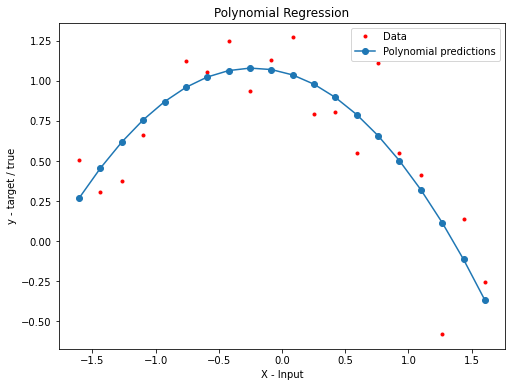

In [ ]:
X = normalisedata(X)
start = timeit.default_timer()
w, b, l = train(X, Y, bs=100, degrees=2,m=20,epochs=1000, lr=0.01)
stop = timeit.default_timer()
run_time2.append(stop-start)
# Plotting
print(w)
fig = plt.figure(figsize=(8,6))
plt.plot(X, Y, 'r.')
plt.plot(X, predict(X, w, b, 2), '-o')
plt.legend(["Data", "Polynomial predictions"])
plt.xlabel('X - Input')
plt.ylabel('y - target / true')
plt.title('Polynomial Regression')
plt.show()

[[ 0.43580704]
 [-0.29767765]
 [-0.12864004]
 [ 0.03028842]
 [-0.12975461]]


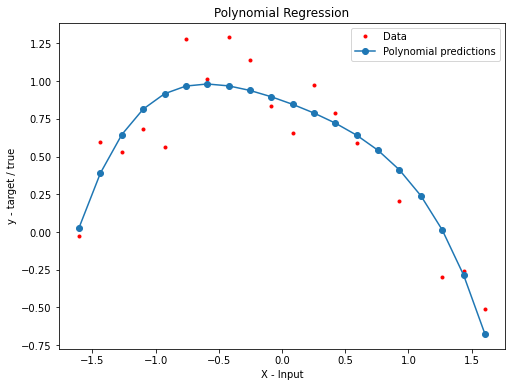

In [ ]:
X = normalisedata(X)
start = timeit.default_timer()
w, b, l = train(X, Y, bs=100, degrees=4,m=20, epochs=1000, lr=0.01)
stop = timeit.default_timer()
run_time2.append(stop-start)

# Plotting
print(w)
fig = plt.figure(figsize=(8,6))
plt.plot(X, Y, 'r.')
plt.plot(X, predict(X, w, b, 4), '-o')
plt.legend(["Data", "Polynomial predictions"])
plt.xlabel('X - Input')
plt.ylabel('y - target / true')
plt.title('Polynomial Regression')
plt.show()

[[ 0.43580704]
 [-0.2637455 ]
 [-0.12864004]
 [-0.11210982]
 [-0.12975461]
 [ 0.05790194]]


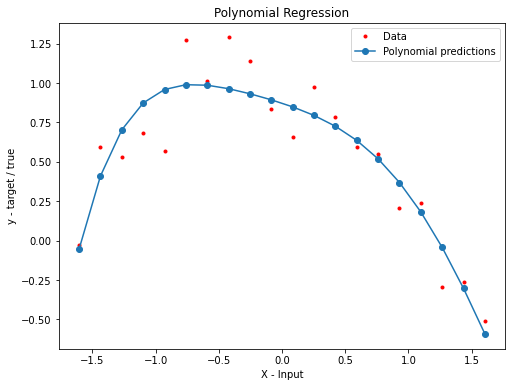

In [ ]:
X = normalisedata(X)
start = timeit.default_timer()
w, b, l = train(X, Y, bs=100, degrees=5,m=20, epochs=1000, lr=0.01)
stop = timeit.default_timer()
run_time2.append(stop-start)

# Plotting
print(w)
fig = plt.figure(figsize=(8,6))
plt.plot(X, Y, 'r.')
plt.plot(X, predict(X, w, b, 5), '-o')
plt.legend(["Data", "Polynomial predictions"])
plt.xlabel('X - Input')
plt.ylabel('y - target / true')
plt.title('Polynomial Regression')
plt.show()

[[ 0.45055275]
 [-0.22098698]
 [-0.15985423]
 [-0.07357291]
 [-0.2075784 ]
 [-0.03542509]
 [ 0.03796529]
 [ 0.02862397]]


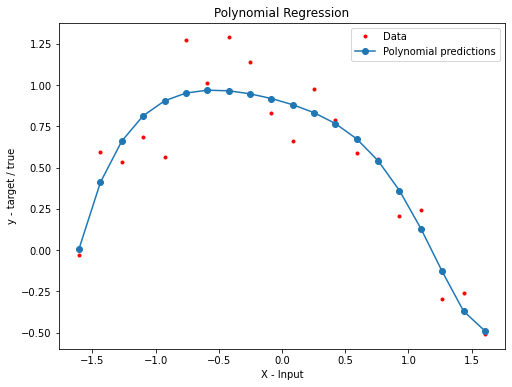

In [ ]:
X = normalisedata(X)
start = timeit.default_timer()
w, b, l = train(X, Y, bs=100, degrees=7,m=20, epochs=1000, lr=0.01)
stop = timeit.default_timer()
run_time2.append(stop-start)

# Plotting
print(w)
fig = plt.figure(figsize=(8,6))
plt.plot(X, Y, 'r.')
plt.plot(X, predict(X, w, b, 7), '-o')
plt.legend(["Data", "Polynomial predictions"])
plt.xlabel('X - Input')
plt.ylabel('y - target / true')
plt.title('Polynomial Regression')
plt.show()

[[ 0.47790244]
 [-0.31656528]
 [-0.22284256]
 [ 0.00852694]
 [-0.27730078]
 [ 0.02903046]
 [-0.08602447]
 [-0.03990159]
 [ 0.17854535]
 [ 0.01418265]
 [-0.04568063]]


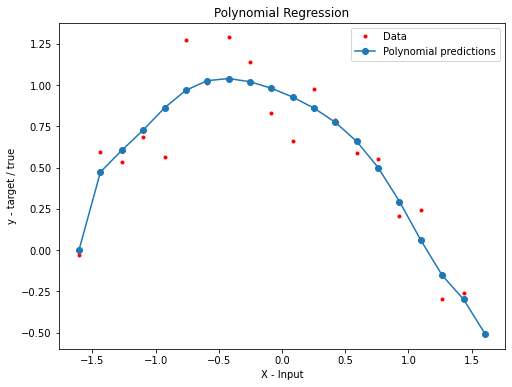

In [ ]:
X = normalisedata(X)
start = timeit.default_timer()
w, b, l = train(X, Y, bs=100, degrees=10,m=20, epochs=30000, lr=0.001)
stop = timeit.default_timer()
run_time2.append(stop-start)

# Plotting
print(w)
fig = plt.figure(figsize=(8,6))
plt.plot(X, Y, 'r.')
plt.plot(X, predict(X, w, b, 10), '-o')
plt.legend(["Data", "Polynomial predictions"])
plt.xlabel('X - Input')
plt.ylabel('y - target / true')
plt.title('Polynomial Regression')
plt.show()

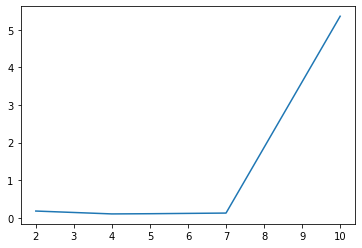

In [ ]:
plt.plot(M,run_time2)

In [ ]:
def poly_regression(x3,fx3):
  M = [2,4,5,7,10]
  w_opt = []
  for m in M:
    gxm = []
    wm = []
    i=0
    for x in x3:
      row = []
      for i in range(m+1):
        fix = pow(x,i)
        row.append(fix)
      gxm.append(row)
    gxm = np.array(gxm)
    wm = np.linalg.inv(gxm.transpose().dot(gxm)).dot(gxm.transpose().dot(fx3))
    print('\nFor M = ',m,', the curve is : ')
    printPoly(wm)
    w_opt.append(wm)
  i=0
  errors = []
  for w in w_opt:
    coeffs = w
    y = PolyCoeff(x3,coeffs)
    error=0
  #y = np.array([np.sum(np.array([coeffs[i]*(j**i) for i in range(len(coeffs)) for j in x2]))])
    for j in range((len(y))):
      error+=pow(y[j]-fx3[j],2)

    error = math.sqrt((1/len(y))*error)
    errors.append(error)
    plt.scatter(x3,fx3,c = 'green')
    plt.plot(x3,y, c = 'red')
    plt.xlabel('x values')
    plt.ylabel('y values')
    plt.title('Polynomial Regression Curve of degree = %i' %M[i])
    i+=1
    plt.show()

  print('errors = ',errors)

For n =  10 , the curves are: 

For M =  2 , the curve is : 
y =  -0.041678037385606145x^2 + 0.37955824381714276x + 0.021461349622567738

For M =  4 , the curve is : 
y =  0.002626916538287366x^4 - 0.05240765116623247x^3 + 0.28391555919824185x^2 - 0.26162567978769324x + 0.18990972812858464

For M =  5 , the curve is : 
y =  -3.990751121007996e-06x^5 + 0.0027266853163121496x^4 - 0.05327806190455675x^3 + 0.2869948424702784x^2 - 0.2653198059520889x + 0.19031523040793275

For M =  7 , the curve is : 
y =  -1.8630841229994033e-05x^7 + 0.0005990662641437439x^6 - 0.007399039561278187x^5 + 0.04646362454514019x^4 - 0.178670914237955x^3 + 0.4395047972466273x^2 - 0.31378229258189094x + 0.18584521001980647

For M =  10 , the curve is : 
y =  1.393716775055509e-05x^10 - 0.000649444293230772x^9 + 0.012767476961016655x^8 - 0.13762027025222778x^7 + 0.8841809034347534x^6 - 3.4417152404785156x^5 + 7.863445281982422x^4 - 9.62936782836914x^3 + 5.178005218505859x^2 - 0.35477447509765625x - 1.41034776704782

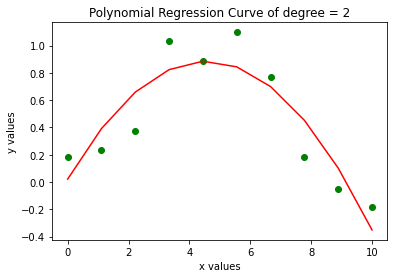

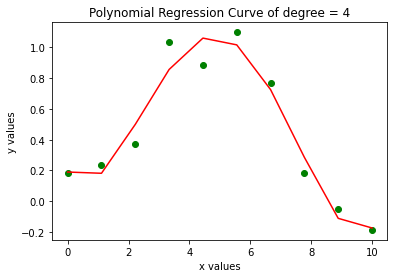

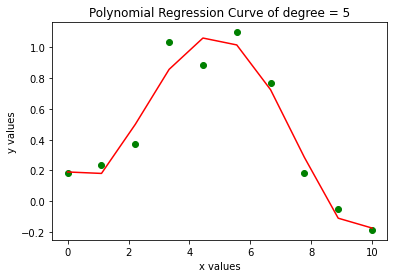

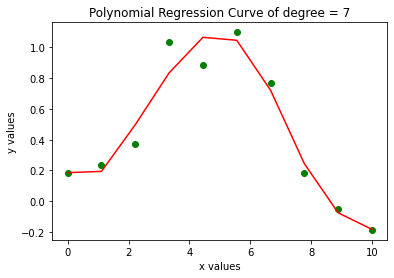

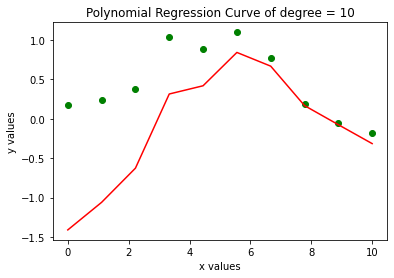

errors =  [0.1914921306292024, 0.10124711092030417, 0.10124535149864368, 0.09892045372043333, 0.7774253406480249]
For n =  20 , the curves are: 

For M =  2 , the curve is : 
y =  -0.052225691110293765x^2 + 0.432994738481961x + 0.1772265811303022

For M =  4 , the curve is : 
y =  0.000241464425296236x^4 - 0.0012283425985832874x^3 - 0.0756913333147109x^2 + 0.5795442484856199x + 0.049233016874999924

For M =  5 , the curve is : 
y =  -0.00012924408409910326x^5 + 0.003472566527775278x^4 - 0.029631012973087678x^3 + 0.027238512055085096x^2 + 0.4460711640941213x + 0.07813505015671396

For M =  7 , the curve is : 
y =  0.00010245585397972157x^7 - 0.0036067667674828385x^6 + 0.04986407569708717x^5 - 0.34130141511832335x^4 + 1.196660182389678x^3 - 2.059771569285658x^2 + 1.7656220175431372x - 0.01603241283191892

For M =  10 , the curve is : 
y =  6.453870039280218e-06x^10 - 0.00031179852089735505x^9 + 0.006393005623976933x^8 - 0.07240737846586853x^7 + 0.493462982121855x^6 - 2.0630166716873646x^

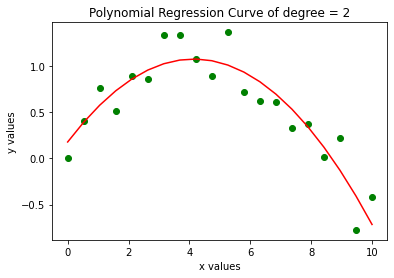

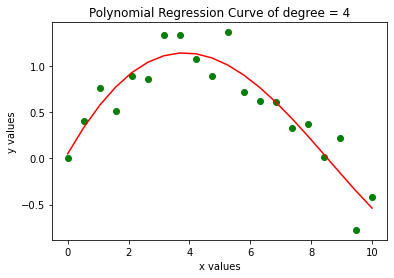

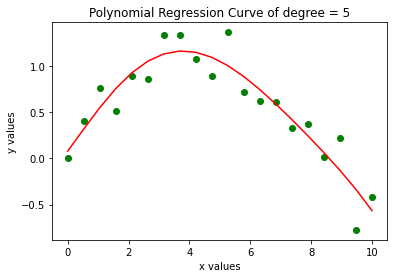

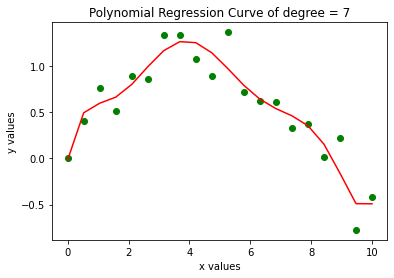

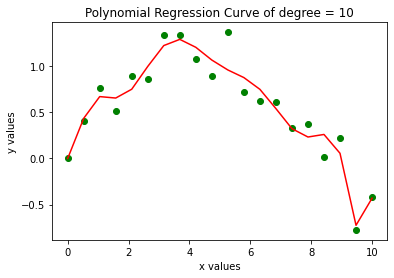

errors =  [0.2178168608473156, 0.2029240729469905, 0.20206732494070737, 0.17978384943947448, 0.1504972530851654]
For n =  50 , the curves are: 

For M =  2 , the curve is : 
y =  -0.05880949879804856x^2 + 0.5231737798324767x - 0.09084751759896292

For M =  4 , the curve is : 
y =  0.0011113194463051104x^4 - 0.016967013489400218x^3 + 0.004244860154385854x^2 + 0.5274296314071005x - 0.19789602937811068

For M =  5 , the curve is : 
y =  -0.00031071728963949496x^5 + 0.008879251687287315x^4 - 0.08568458150197955x^3 + 0.2582151562454271x^2 + 0.17874759976331234x - 0.0980133923545381

For M =  7 , the curve is : 
y =  -3.7366604396710246e-05x^7 + 0.001407497220945686x^6 - 0.02135591740133691x^5 + 0.16715350991785272x^4 - 0.7095870310849932x^3 + 1.4694377714422444x^2 - 0.7625085869040049x + 0.04994909862375607

For M =  10 , the curve is : 
y =  1.931370146479594e-06x^10 - 9.576499627428348e-05x^9 + 0.0020136935618211282x^8 - 0.02341102583159227x^7 + 0.16468591568991542x^6 - 0.7230618405155838

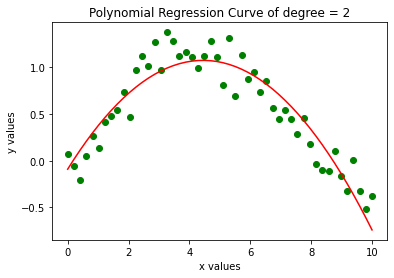

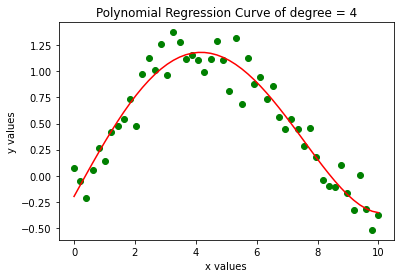

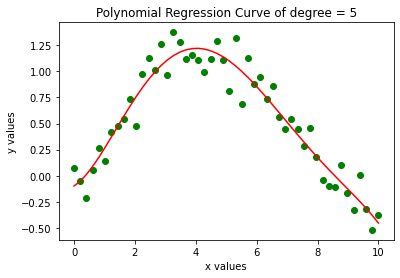

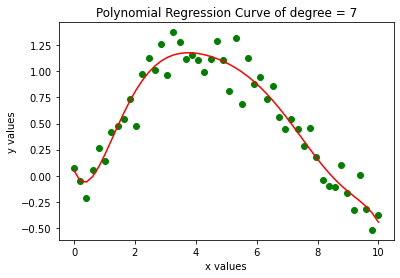

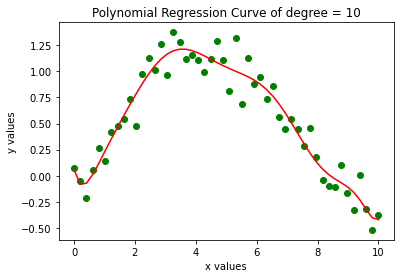

errors =  [0.1929278060645642, 0.1512582329844916, 0.14568621613535074, 0.13832502595183632, 0.13534262742211753]
For n =  100 , the curves are: 

For M =  2 , the curve is : 
y =  -0.05285342247190544x^2 + 0.46202737047189557x - 0.004376592760491516

For M =  4 , the curve is : 
y =  0.0008236829528052228x^4 - 0.013549448297840883x^3 + 0.008834940286924109x^2 + 0.4047675701409741x - 0.03551746869035455

For M =  5 , the curve is : 
y =  -7.084743227170343e-05x^5 + 0.002594868759596025x^4 - 0.02925476964419005x^3 + 0.06729617980289504x^2 + 0.3229011831917319x - 0.010144256932505868

For M =  7 , the curve is : 
y =  2.396790627173795e-05x^7 - 0.0008951768352147838x^6 + 0.013215134702534215x^5 - 0.09676669277519068x^4 + 0.36154118115064193x^3 - 0.6951113644081488x^2 + 0.9301425743415166x - 0.11857560485077556

For M =  10 , the curve is : 
y =  3.893507773966576e-07x^10 - 2.460074932741918e-05x^9 + 0.0006637423693973687x^8 - 0.009948712773621082x^7 + 0.090361692244187x^6 - 0.50926100276

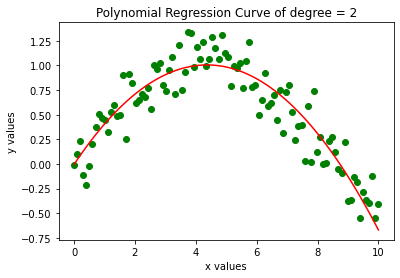

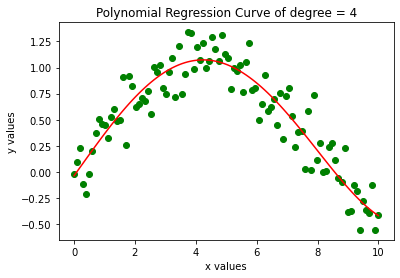

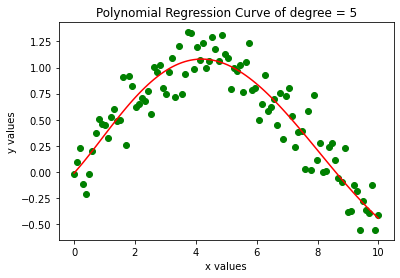

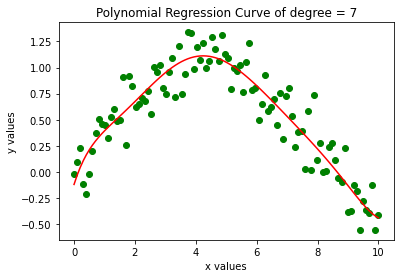

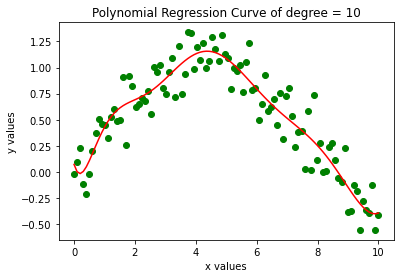

errors =  [0.19266114450405725, 0.17949053034840257, 0.17927028498928185, 0.1773401095089132, 0.17143878119803102]
For n =  150 , the curves are: 

For M =  2 , the curve is : 
y =  -0.052731613164927804x^2 + 0.4604895808193381x + 0.041878236411912795

For M =  4 , the curve is : 
y =  0.0005952547880183068x^4 - 0.00929508625141473x^3 - 0.015518296416539457x^2 + 0.44818719153189335x - 0.004352376147087611

For M =  5 , the curve is : 
y =  -0.0001370199364469915x^5 + 0.004020753199203142x^4 - 0.03969390093340053x^3 + 0.0979140826941034x^2 + 0.28828408255935756x + 0.04645632060666571

For M =  7 , the curve is : 
y =  1.7013604687976525e-05x^7 - 0.0005607757583305784x^6 + 0.007058212461743096x^5 - 0.041202017720934236x^4 + 0.10372906284464989x^3 - 0.11318481381749734x^2 + 0.39998805063805776x + 0.037404978271297296

For M =  10 , the curve is : 
y =  1.8283995126822106e-06x^10 - 9.116619838778206e-05x^9 + 0.0019385752239031717x^8 - 0.02291601047181757x^7 + 0.164519447600469x^6 - 0.73582

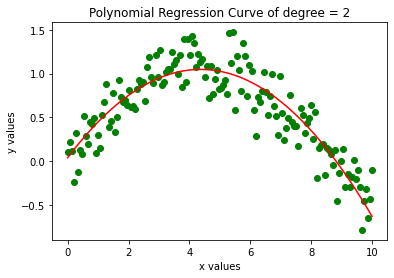

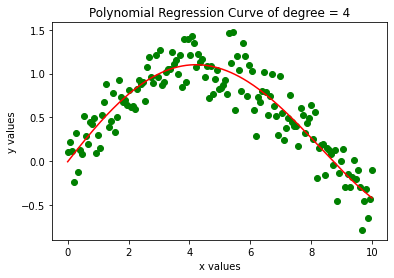

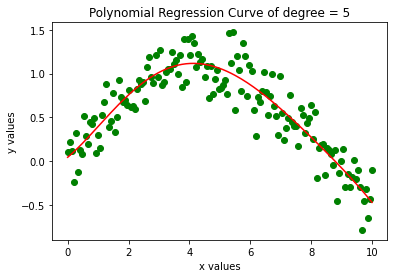

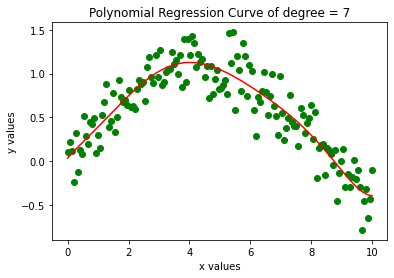

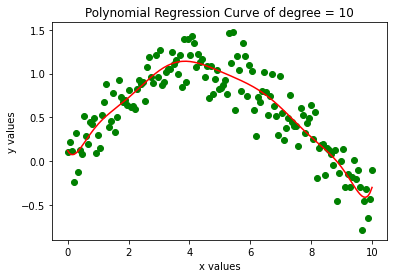

errors =  [0.20894580249235242, 0.20070097997875713, 0.19998556690399275, 0.19924443418158044, 0.1978562073222347]
For n =  200 , the curves are: 

For M =  2 , the curve is : 
y =  -0.05229887063953775x^2 + 0.44945483190663027x + 0.06999894260571704

For M =  4 , the curve is : 
y =  0.0009189289824435426x^4 - 0.014898300140662624x^3 + 0.013448703376035098x^2 + 0.3971600108758153x + 0.025953381228811523

For M =  5 , the curve is : 
y =  -2.4167371263927873e-05x^5 + 0.0015231132640423084x^4 - 0.020262181906907983x^3 + 0.033488501710110086x^2 + 0.3688162909963353x + 0.035070102265592595

For M =  7 , the curve is : 
y =  -1.5457886256564635e-06x^7 + 0.00010438765821163543x^6 - 0.002281225630440531x^5 + 0.02383593511694926x^4 - 0.13013228491945483x^3 + 0.29331450577956275x^2 + 0.12154044867202174x + 0.08955257003253791

For M =  10 , the curve is : 
y =  1.4118294018317101e-06x^10 - 7.031426775938598e-05x^9 + 0.0014739567468495807x^8 - 0.016869229439180344x^7 + 0.11427869158796966x^6 - 

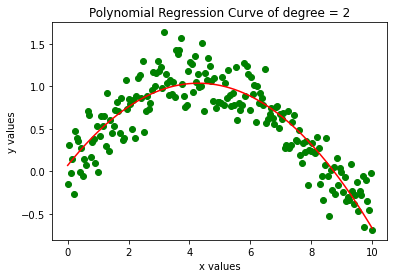

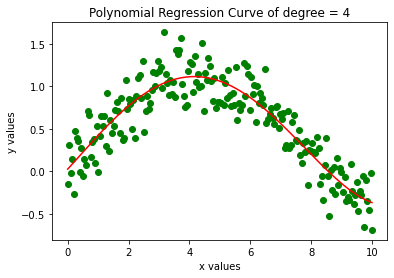

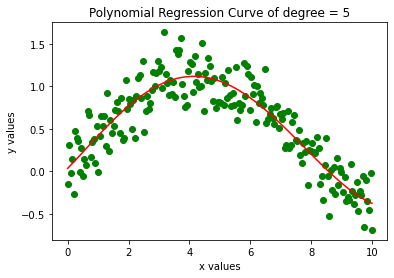

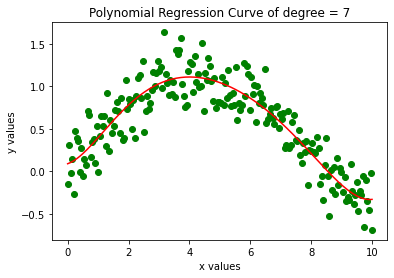

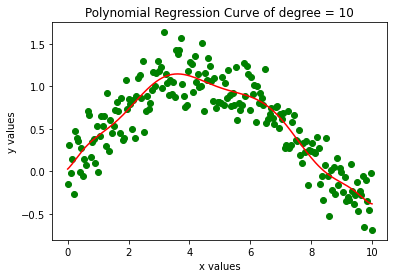

errors =  [0.22806176106880285, 0.2134576162203144, 0.2134370518112097, 0.21286741429228767, 0.20936035004814826]
For n =  400 , the curves are: 

For M =  2 , the curve is : 
y =  -0.05181657686606064x^2 + 0.4454892575215508x + 0.06306265782206344

For M =  4 , the curve is : 
y =  0.0007203826110805528x^4 - 0.010815679677506296x^3 - 0.013152597684033651x^2 + 0.4556849259384492x - 0.013816503346273379

For M =  5 , the curve is : 
y =  -2.3110261200220972e-05x^5 + 0.0012981391410900045x^4 - 0.015948099668584348x^3 + 0.006058049181518754x^2 + 0.4283779574917048x - 0.004873598874723939

For M =  7 , the curve is : 
y =  -3.6350516530170296e-06x^7 + 0.000154309044866352x^6 - 0.0025964557806332778x^5 + 0.02274140447116224x^4 - 0.10941753800034348x^3 + 0.20796486341350828x^2 + 0.24858153798777494x + 0.03339556650553277

For M =  10 , the curve is : 
y =  1.8197468332203925e-07x^10 - 1.022651736093394e-05x^9 + 0.0002470004856149899x^8 - 0.0033494122471893206x^7 + 0.027963942324277014x^6 - 0

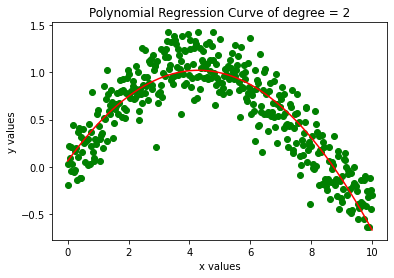

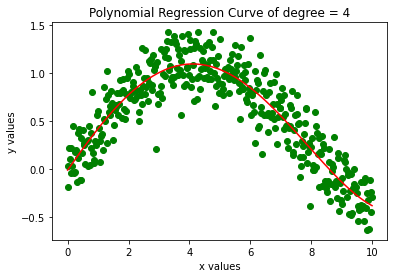

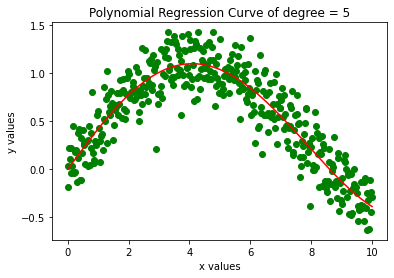

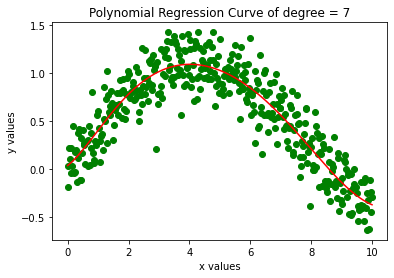

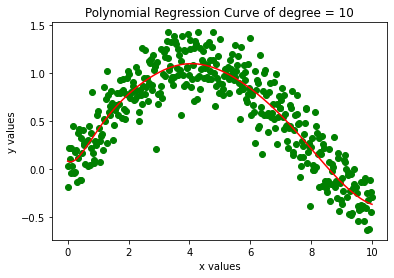

errors =  [0.21479668089116824, 0.20064896183592584, 0.20062943230446934, 0.20044044546158843, 0.20030351439784747]
For n =  500 , the curves are: 

For M =  2 , the curve is : 
y =  -0.05632580599417192x^2 + 0.49255323570996423x - 0.022791683115025663

For M =  4 , the curve is : 
y =  0.00038738674631629694x^4 - 0.00548278921272316x^3 - 0.040526284309199134x^2 + 0.5179636637941378x - 0.08068104955512556

For M =  5 , the curve is : 
y =  -8.07747115008639e-05x^5 + 0.0024067545338652963x^4 - 0.023423786214287645x^3 + 0.026651891957158114x^2 + 0.4223778096099977x - 0.0492654538663686

For M =  7 , the curve is : 
y =  -7.908779654619558e-06x^7 + 0.0002605417963934542x^6 - 0.0034242632302721177x^5 + 0.023448411920753642x^4 - 0.09039294894864724x^3 + 0.12607807564199902x^2 + 0.3684419649416668x - 0.04425513927026259

For M =  10 , the curve is : 
y =  -1.4810039061785574e-07x^10 + 2.8973971097912e-06x^9 + 5.8970506870537065e-05x^8 - 0.002513307408662513x^7 + 0.03485073824413121x^6 - 0.25

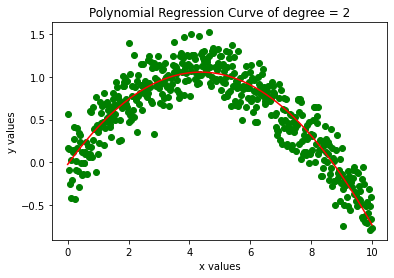

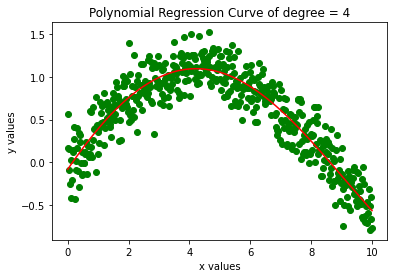

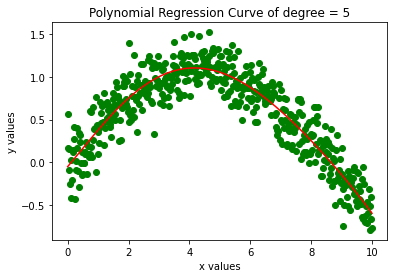

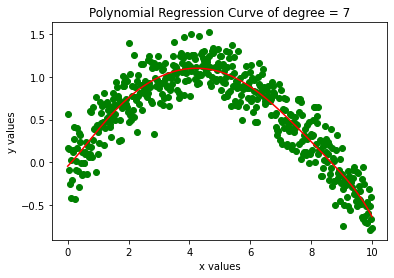

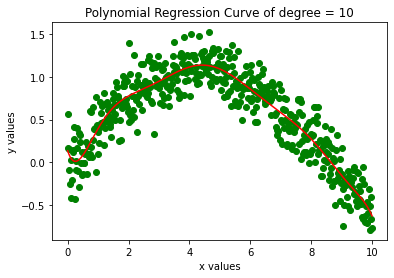

errors =  [0.2050554555339846, 0.19961919768193717, 0.1993804255609721, 0.19922790535469312, 0.19623539913031998]


In [ ]:
run_time_for_diff_n_pr = []
for n in [10,20,50,100,150,200,400,500]:
  #x2 = np.arange(0,10,step = 0.5)
#x2 = np.random.random(20)*10
  x3 = np.linspace(0,10,num=n)
  fx3 = []
  print('For n = ',n,', the curves are: ')
  for x in x3:
    noise  = np.random.normal(0,0.2)
    y3 = np.sin(x*np.pi/8) + x/(12*np.pi) + noise
    fx3.append(y3)
  start = timeit.default_timer()
  w_opt = poly_regression(x3,fx3)
  stop = timeit.default_timer()
  run_time_for_diff_n_pr.append(stop-start)

For n =  10 and  M = 4, the curves are: 


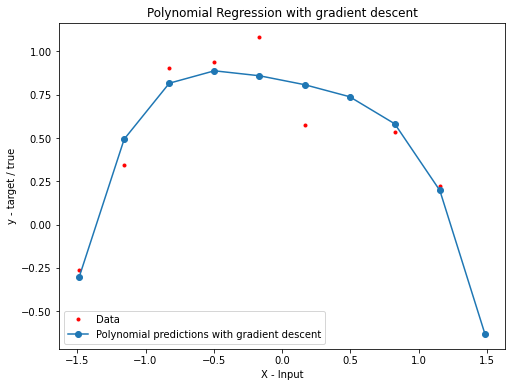

For n =  20 and  M = 4, the curves are: 


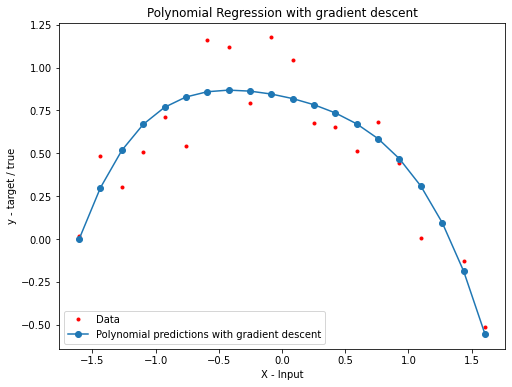

For n =  50 and  M = 4, the curves are: 


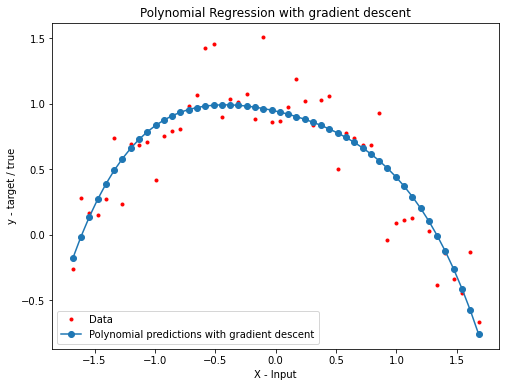

For n =  100 and  M = 4, the curves are: 


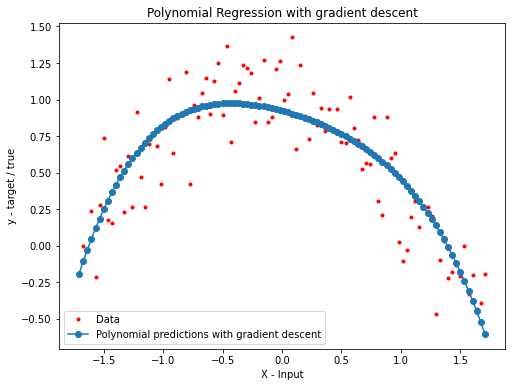

For n =  150 and  M = 4, the curves are: 


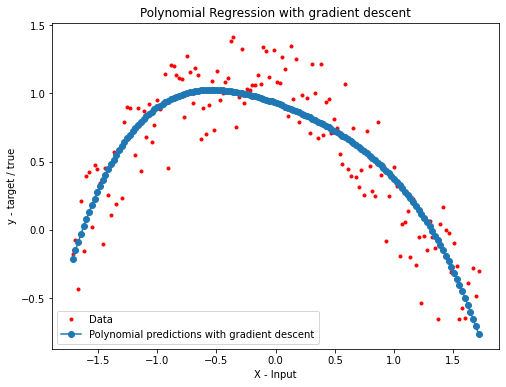

For n =  200 and  M = 4, the curves are: 


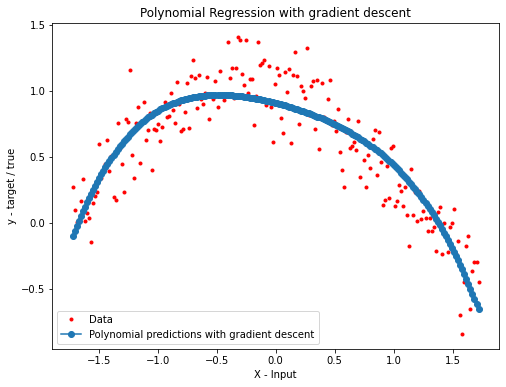

For n =  400 and  M = 4, the curves are: 


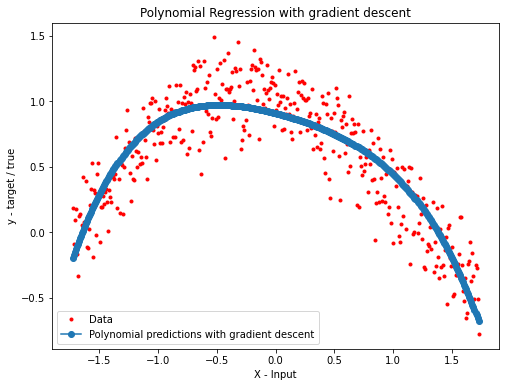

For n =  500 and  M = 4, the curves are: 


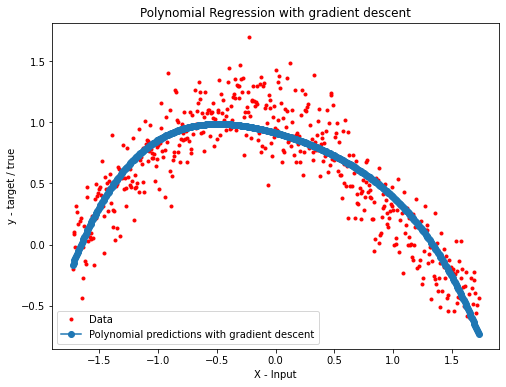

In [ ]:
run_time_for_diff_n_gd = []
for n in [10,20,50,100,150,200,400,500]:
  x3 = np.linspace(0,10,num=n)
  fx3 = []
  print('For n = ',n,'and  M = 4, the curves are: ')
  for x in x3:
    noise  = np.random.normal(0,0.2)
    y3 = np.sin(x*np.pi/8) + x/(12*np.pi) + noise
    fx3.append(y3)
  
  x3 = normalisedata(x3)
  start = timeit.default_timer()
  stop = timeit.default_timer()
  run_time_for_diff_n_gd.append(stop-start)
  w,b,l = train(x3,fx3,bs=100,degrees = 4,m=n,epochs=1000,lr=0.01)
  fig = plt.figure(figsize=(8,6))
  plt.plot(x3, fx3, 'r.')
  plt.plot(x3, predict(x3, w, b, 4), '-o')
  plt.legend(["Data", "Polynomial predictions with gradient descent"])
  plt.xlabel('X - Input')
  plt.ylabel('y - target / true')
  plt.title('Polynomial Regression with gradient descent')
  plt.show()

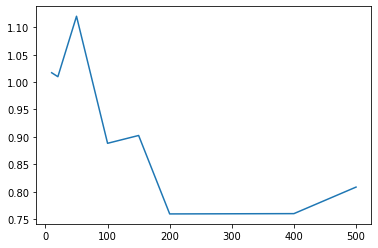

In [ ]:
N = [10,20,50,100,150,200,400,500]
plt.plot(N,run_time_for_diff_n_pr)

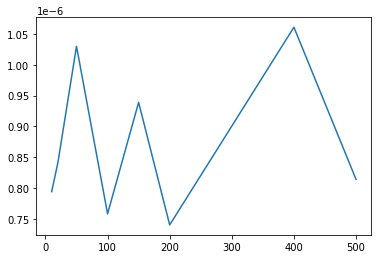

In [ ]:
N = [10,20,50,100,150,200,400,500]
plt.plot(N,run_time_for_diff_n_gd)

#Adult Dataset

###About the Dataset
The data set contains information of 32562 individuals from the 1994
census, of which 21790 are males and 10771 are females. We choose six attributes as feature set: age, fnlwgt, education_num, capital_gain, hours_per_week, sex. Our goal is to predict captial_gain using other attributes. You can read more about the dataset [here](https://archive.ics.uci.edu/ml/datasets/adult) 


**TASK 3**:                                                      **(37 Marks)**

We will be understanding the concept of linear regression along with the regularization parameter on the Adult dataset which has multiple attributes. 

0. Load Adult Dataset into pandas dataframe and print it. You can randomly subsample dataset size to $10,000$ points.  
1. **Feature Normalization:** As discussed in the class, we first have to standardize all the features by subtracting with the mean and dividing by the standard deviation. Verify your technique by computing the mean and variance of the transformed data and check if the mean is $0$ and variance is $1$.  **[2 Marks (1+1) ]**

2. **$K-$Fold Cross Validation:** Randomly partition the data into a training and test set. Fix 20\% of the instances into the test set. With the remaining create training and validation sets with $K-$fold cross validation. You can take the value of $K$ to be 10.  **[3 Marks]**

3. **Stratisfied $K$-fold cross validation**: Create a balanced dataset such that each training and validation set contain balanced data representation. For the Adult dataset, consider balanced with respect to gender (male/female).Fix 20\% of the instances into the test set. Then with the remaining create balanced training and validation dataset by keeping the value of $K$ to be 10. To read more refer https://www.geeksforgeeks.org/stratified-k-fold-cross-validation/  **[3 Marks]**

4. **Lasso-Regression:** Here, implement your own function LassoRegUnfair$(X, Y, \lambda)$ that calculates the linear least square solution with the lasso regression penalty parameter $\lambda$ and return regression weights. Use gradient descent technique to find these weights. Implement PredLassoRegUnfair(X, weights) that returns $Y$ given the input $X$ with learnt weights. (Use datasets obtained using $K$-fold cross validation (For exact definition of Lasso see the side notes below).  **[10 Marks]**

5. Repeat previous part with dataset obtained using statisfied $K$-fold validation i.e. implement LassoRegFair$(X, Y, \lambda)$  and PredLassoRegFair(X, weights).  **[10 Marks]**

6. Plot the mean square error for each of the dataset obtained from $K-$fold cross validation with respect to different $\lambda$ values. Explain your finding and suggest what value of $\lambda$ will you choose based on the obtained plot.  **[3 Marks]**

7. Plot the mean square error for each of the dataset obtained from stratisfied $K-$fold cross validation with respect to different $\lambda$ values. Explain your finding and suggest what value of $\lambda$ will you choose based on the obtained plot. Compare results with unfair model i.e. model prepared with random paritions. Such fairness is called **social fairness** in literature (refer sideNotes below).  **[3 Marks]** 

8.  Plot the training error, variance and test error against different values of $\lambda$ on datasets generated using $K$-fold validation.  Explain your finding and suggest what value of $\lambda$ will you choose based on the obtained plot. Explain your result in the context of bias variance trade off.
 **[3 Marks]**


Write your code by creating cells below.


In [ ]:
import pandas as pd
import random
from random import sample

In [ ]:
col_names = ["Age","workclass","fnlwgt","education","education_num","marital-status","occupation","relationship","race","sex","capital-gain","capital-loss","hours-per-week","Native-country","Income"]
df1 = pd.read_csv('/content/adult.data',sep=', ',names= col_names, index_col=False)
df1

,Age,workclass,fnlwgt,education,education_num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,Native-country,Income
0,39,State-gov,77516,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,215646,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,234721,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,338409,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25771,44,Private,187629,Assoc-acdm,12.0,Never-married,Craft-repair,Not-in-family,White,Male,0.0,0.0,25.0,United-States,<=50K
25772,63,?,106648,HS-grad,9.0,Married-civ-spouse,?,Husband,White,Male,0.0,0.0,25.0,United-States,<=50K
25773,22,Private,305781,HS-grad,9.0,Never-married,Sales,Not-in-family,White,Male,0.0,0.0,45.0,Canada,<=50K
25774,31,Self-emp-inc,256362,Bachelors,13.0,Married-civ-spouse,Sales,Husband,White,Male,3908.0,0.0,50.0,United-States,<=50K


In [ ]:
df1 = df1.sample(10000)
df1

,Age,workclass,fnlwgt,education,education_num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,Native-country,Income
4148,63,Self-emp-not-inc,117681,Assoc-voc,11.0,Married-civ-spouse,Farming-fishing,Husband,White,1.0,0.0,0.0,40.0,United-States,<=50K
2032,34,Private,229732,Assoc-voc,11.0,Married-civ-spouse,Craft-repair,Husband,White,1.0,0.0,0.0,40.0,United-States,<=50K
5463,53,Private,169182,10th,6.0,Married-spouse-absent,Machine-op-inspct,Not-in-family,White,0.0,0.0,0.0,40.0,Columbia,<=50K
4957,25,Private,108779,Masters,14.0,Separated,Other-service,Own-child,White,0.0,0.0,0.0,40.0,United-States,<=50K
5863,64,Private,256019,Masters,14.0,Never-married,Prof-specialty,Not-in-family,White,0.0,0.0,0.0,35.0,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24117,28,Private,282389,HS-grad,9.0,Never-married,Transport-moving,Not-in-family,White,1.0,0.0,0.0,60.0,United-States,<=50K
9060,24,Private,161092,Some-college,10.0,Married-civ-spouse,Adm-clerical,Husband,White,1.0,7298.0,0.0,40.0,United-States,>50K
8878,30,Private,158688,HS-grad,9.0,Married-civ-spouse,Machine-op-inspct,Husband,White,1.0,0.0,0.0,40.0,United-States,<=50K
21169,48,Private,117251,HS-grad,9.0,Widowed,Adm-clerical,Not-in-family,White,0.0,0.0,0.0,32.0,United-States,<=50K


In [ ]:
#write your code here You can create more cells
df1["sex"].replace('Female',0,inplace = True)
df1["sex"].replace('Male',1,inplace = True)

features = df1[["Age","fnlwgt","education_num","hours-per-week","sex"]]

col = ["Age","fnlwgt","education_num","hours-per-week","sex"]
features


,Age,fnlwgt,education_num,hours-per-week,sex
4148,63,117681,11.0,40.0,1.0
2032,34,229732,11.0,40.0,1.0
5463,53,169182,6.0,40.0,0.0
4957,25,108779,14.0,40.0,0.0
5863,64,256019,14.0,35.0,0.0
...,...,...,...,...,...
24117,28,282389,9.0,60.0,1.0
9060,24,161092,10.0,40.0,1.0
8878,30,158688,9.0,40.0,1.0
21169,48,117251,9.0,32.0,0.0


In [ ]:
for i in col:
  mean = features[i].mean()
  sd = features[i].std()
  features.loc[:,i] = (features.loc[:,i]-mean)/sd

features

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


,Age,fnlwgt,education_num,hours-per-week,sex
4148,1.761745,-0.673192,0.353549,-0.022903,0.699554
2032,-0.344155,0.378922,0.353549,-0.022903,0.699554
5463,1.035573,-0.189618,-1.586258,-0.022903,-1.429339
4957,-0.997710,-0.756778,1.517434,-0.022903,-1.429339
5863,1.834362,0.625746,1.517434,-0.435868,-1.429339
...,...,...,...,...,...
24117,-0.779858,0.873349,-0.422374,1.628957,0.699554
9060,-1.070327,-0.265580,-0.034412,-0.022903,0.699554
8878,-0.634624,-0.288153,-0.422374,-0.022903,0.699554
21169,0.672486,-0.677229,-0.422374,-0.683647,-1.429339


In [ ]:
features.mean()
#Checking the mean of the normalized data features
#very close to zero

Age              -1.172396e-17
fnlwgt           -5.258016e-17
education_num     2.607692e-16
hours-per-week    2.437162e-16
sex               6.394885e-18
dtype: float64

In [ ]:
features.std()
#Checking the Standard Deviation of the normalized data features

Age               1.0
fnlwgt            1.0
education_num     1.0
hours-per-week    1.0
sex               1.0
dtype: float64

In [ ]:
df = features.copy()

df['capital-gain']=df1['capital-gain']
df

,Age,fnlwgt,education_num,hours-per-week,sex,capital-gain
4148,1.761745,-0.673192,0.353549,-0.022903,0.699554,0.0
2032,-0.344155,0.378922,0.353549,-0.022903,0.699554,0.0
5463,1.035573,-0.189618,-1.586258,-0.022903,-1.429339,0.0
4957,-0.997710,-0.756778,1.517434,-0.022903,-1.429339,0.0
5863,1.834362,0.625746,1.517434,-0.435868,-1.429339,0.0
...,...,...,...,...,...,...
24117,-0.779858,0.873349,-0.422374,1.628957,0.699554,0.0
9060,-1.070327,-0.265580,-0.034412,-0.022903,0.699554,7298.0
8878,-0.634624,-0.288153,-0.422374,-0.022903,0.699554,0.0
21169,0.672486,-0.677229,-0.422374,-0.683647,-1.429339,0.0


In [ ]:
Y = df['capital-gain']
Y

4148        0.0
2032        0.0
5463        0.0
4957        0.0
5863        0.0
          ...  
24117       0.0
9060     7298.0
8878        0.0
21169       0.0
17935       0.0
Name: capital-gain, Length: 10000, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(features, Y, test_size=0.2)
#print(x_train)
#print(y_train)

In [ ]:
x = x_train.iloc[:,0:5].values
y = y_train.values
print("Matrix of features", x, sep='\n')
print("--------------------------------------------------")
print("Target Variable", y, sep='\n')
print(x.shape[0])

Matrix of features
[[ 0.3820175   1.26055749  1.12947214 -2.91365836 -1.42933877]
 [-1.21556172 -0.20271686 -0.42237362 -0.02290304 -1.42933877]
 [ 1.18080711 -1.30872655 -1.1982965  -0.02290304 -1.42933877]
 ...
 [-0.48938935 -0.72524778 -3.52606515 -0.02290304 -1.42933877]
 [ 0.30940026 -0.02993894 -0.03441218 -0.02290304 -1.42933877]
 [-0.41677211 -0.82658028 -0.42237362  0.14228298 -1.42933877]]
--------------------------------------------------
Target Variable
[   0.    0.    0. ... 4508.    0.    0.]
8000


In [ ]:
data = np.array(df.values)
data

array([[ 1.76174501, -0.67319187,  0.35354926, -0.02290304,  0.69955424,
         0.        ],
       [-0.34415487,  0.37892155,  0.35354926, -0.02290304,  0.69955424,
         0.        ],
       [ 1.03557264, -0.18961838, -1.58625795, -0.02290304, -1.42933877,
         0.        ],
       ...,
       [-0.63462382, -0.28815278, -0.42237362, -0.02290304,  0.69955424,
         0.        ],
       [ 0.67248645, -0.6772294 , -0.42237362, -0.68364711, -1.42933877,
         0.        ],
       [-1.14294448, -0.45613262,  1.12947214, -0.02290304, -1.42933877,
         0.        ]])

In [ ]:
np.random.seed(0)

In [ ]:
indices = [i for i in range (data.shape[0])]

In [ ]:
np.random.shuffle(indices)

In [ ]:
train_data = data[indices[:(data.shape[0]*80)//100]]
test_data = data[indices[(data.shape[0]*80)//100:]]

In [ ]:
X_train = train_data[:, :-1]
Y_train = train_data[:, -1]

X_test = test_data[:, :-1]
Y_test = test_data[:, -1]

In [ ]:
num = x_train.shape[0]//10
num

800

In [ ]:
#k-fold clustering on the training set
train_data_kx = []
train_data_ky = []
i = 0
while i < (len(x_train)):
    if(i+num<x_train.shape[0]):
        temp_x = X_train[i:i+num]
        temp_y = Y_train[i:i+num]
        i = i+num
    else:
        temp_x = X_train[i:]
        temp_y = Y_train[i:]
        i = x_train.shape[0]
        
    train_data_kx.append(temp_x)
    train_data_ky.append(temp_y)

In [ ]:
def magnitude_eval(w):
  sum=0
  for wi in w:
    sum+=pow(wi,2)
  
  return math.sqrt(sum)

In [ ]:
def lasso_reg(X,Y,lam,eta=0.0001):
  n,m = X.shape
  X_new = np.zeros((n,m))
  X_new[:,0:m] = X
  Y_new = np.ndarray((n,1))
  for i in range(n):
    Y_new[i][0] = Y[i]
  w = np.zeros((m,1))
  #mag_w = magnitude_eval(w)
  grad_w = -2*(X_new.T)@(Y_new-X_new@w)+2*lam*w
  w_new = w-eta*grad_w
  mrss_lam = lambda w:((Y_new - (X_new@w)).T)@(Y_new-(X_new@w)) + lam*(magnitude_eval(w))
  i=0
  while i<300:
    w = w_new
    grad_w = -2*(X_new.T)@(Y_new-X_new@w)+2*lam*w
    w_new = w-eta*grad_w
    i+=1
    if abs(mrss_lam(w_new))>abs(mrss_lam(w)):
      break
  
  #print(w)
  return w


In [ ]:
def pred_lasso_reg(x,weights):
  return np.dot(x,weights)

In [ ]:
def find_mse(y_pred,y_actual):
  n = len(y_pred)
  mse=0
  for i in range(n):
    mse = mse+(y_pred[i]-y_actual[i])**2
  mse = mse/n
  #print(mse)
  return mse

In [ ]:
def kfold_mse_w(train_data_kx, train_data_ky, lam):
    mse_list = []
    w_list = []
    w_grand = None
    flag = 0
    for i in range(len(train_data_kx)):
        validation_x = train_data_kx[i]
        validation_y = train_data_ky[i]
        concatx_list = []
        concaty_list = []
        for j in range(len(train_data_kx)):
            if(j!=i):
                concatx_list.append(train_data_kx[j])
                concaty_list.append(train_data_ky[j])
        train_x = np.concatenate(concatx_list)
        train_y = np.concatenate(concaty_list)
        w_pred = lasso_reg(train_x, train_y, lam)
        y_pred = []
        for j in range(len(validation_x)):
            y_pred.append(pred_lasso_reg(validation_x[j], w_pred))
        mse = find_mse(y_pred, validation_y)
        #print(mse)
        mse_list.append(mse)
        w_list.append(w_pred)
        if not flag:
            w_grand = np.array(w_pred)
            flag = 1
        else:
            w_grand = w_grand + np.array(w_pred)
    return np.sum(mse_list)/len(mse_list), (w_grand)/len(w_list), w_list

In [ ]:
kfold_mse_w(train_data_kx,train_data_ky,0.08)

(45530917.63745834, array([[319.02684995],
        [ 26.87103872],
        [716.08270563],
        [283.58077535],
        [130.34777763]]), [array([[323.9066882 ],
         [ 60.77402064],
         [693.48449773],
         [319.22847134],
         [155.20286419]]), array([[286.26320034],
         [  8.81776508],
         [743.0877012 ],
         [318.2310388 ],
         [125.33336369]]), array([[309.22642731],
         [-15.19879081],
         [706.81895346],
         [311.18040263],
         [107.6246632 ]]), array([[319.74207287],
         [ 44.60135916],
         [710.21303687],
         [216.09364783],
         [108.86685365]]), array([[344.41973995],
         [ 48.42996321],
         [681.98127713],
         [240.37059307],
         [124.10129977]]), array([[346.67001736],
         [ 26.49609353],
         [747.7573488 ],
         [246.57866821],
         [128.96827082]]), array([[337.86836879],
         [-15.54183245],
         [716.29325958],
         [294.67425628],
         [

In [ ]:
from math import pow

In [ ]:
power_list = np.arange(-10, 10)

In [ ]:
lam_list = [i*pow(10,j) for j in power_list for i in range(1, 10)]

In [ ]:
mse_list = [kfold_mse_w(train_data_kx, train_data_ky, lamb)[0] for lamb in lam_list]

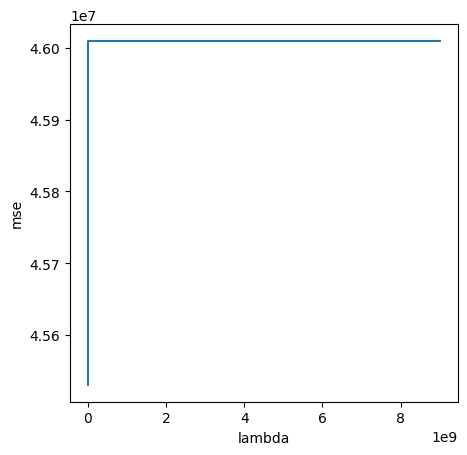

In [ ]:
fig = plt.figure(figsize=(5, 5), dpi=100)
plt.xlabel("lambda")
plt.ylabel("mse")
plt.plot(lam_list, mse_list)
plt.show()

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error


In [ ]:
x = df.drop('capital-gain',axis=1)
y = df['capital-gain']

In [ ]:
def stratkfold_with_lasso(lamb):
  # Define the stratified k-fold cross-validation
  skf = StratifiedKFold(n_splits=10)

# Initialize the list to store the mean squared errors
  mse = []

# Iterate over the folds
  for train_index, test_index in skf.split(x, y):
    X_train, X_test = x.iloc[train_index].values, x.iloc[test_index].values
    y_train, y_test = y.iloc[train_index].values, y.iloc[test_index].values
    w=lasso_reg(X_train,y_train,lamb)
    y_pred = pred_lasso_reg(X_train,w)
    mse = find_mse(y_pred,y_train)
    return w,y_pred, mse

In [ ]:
w=[]
y_pred=[]
mse = []
lam = [0.0001,0.05,0.1,5,10,50,200,500,700,900,1000,2000,3000,4000,5000]
for lamb in lam:
  wi,y_predi,msei = stratkfold_with_lasso(lamb)
  w.append(wi)
  y_pred.append(y_predi)
  mse.append(msei)

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklear

In [ ]:
w

[array([[ 732.42156497],
        [  27.87114998],
        [1477.92865313],
        [ 810.24199902],
        [ 413.21181817]]), array([[ 732.42156497],
        [  27.87114998],
        [1477.92865313],
        [ 810.24199902],
        [ 413.21181817]]), array([[ 732.42156497],
        [  27.87114998],
        [1477.92865313],
        [ 810.24199902],
        [ 413.21181817]]), array([[ 732.42156497],
        [  27.87114998],
        [1477.92865313],
        [ 810.24199902],
        [ 413.21181817]]), array([[ 732.42156497],
        [  27.87114998],
        [1477.92865313],
        [ 810.24199902],
        [ 413.21181817]]), array([[ 732.42156497],
        [  27.87114998],
        [1477.92865313],
        [ 810.24199902],
        [ 413.21181817]]), array([[ 732.42156497],
        [  27.87114998],
        [1477.92865313],
        [ 810.24199902],
        [ 413.21181817]]), array([[ 732.42156497],
        [  27.87114998],
        [1477.92865313],
        [ 810.24199902],
        [ 413.2118

In [ ]:
y_pred

[array([[-4663.84227457],
        [-2480.24205604],
        [ 1156.80535915],
        ...,
        [ -826.57432498],
        [-1295.1089366 ],
        [  210.27244059]]), array([[-4663.84227457],
        [-2480.24205604],
        [ 1156.80535915],
        ...,
        [ -826.57432498],
        [-1295.1089366 ],
        [  210.27244059]]), array([[-4663.84227457],
        [-2480.24205604],
        [ 1156.80535915],
        ...,
        [ -826.57432498],
        [-1295.1089366 ],
        [  210.27244059]]), array([[-4663.84227457],
        [-2480.24205604],
        [ 1156.80535915],
        ...,
        [ -826.57432498],
        [-1295.1089366 ],
        [  210.27244059]]), array([[-4663.84227457],
        [-2480.24205604],
        [ 1156.80535915],
        ...,
        [ -826.57432498],
        [-1295.1089366 ],
        [  210.27244059]]), array([[-4663.84227457],
        [-2480.24205604],
        [ 1156.80535915],
        ...,
        [ -826.57432498],
        [-1295.1089366 ],
       

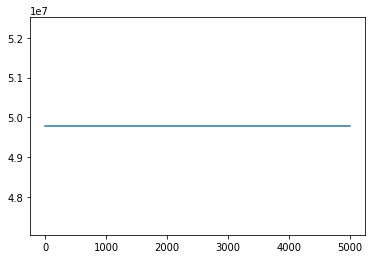

In [ ]:
plt.plot(lam,mse)

**Side Notes: LASSO Regularization**:
Regularization is implemented to avoid overfitting of the data. LASSO is a regularization technique used in feature selection using a Shrinkage method also referred to as the penalized regression method. Lasso is short for Least Absolute Shrinkage and Selection Operator, which is used both for regularization and model selection. If a model uses the L1 regularization technique, then it is called lasso regression.

In this shrinkage technique, the coefficients determined in the regression model are penalized by a factor called the alpha α (or sometimes lamda). 
In the equation shown below there are basically two terms one is old least sqaure loss and other term is regularization term. The regularization term consist of a trade-off factor $λ$ followed by weight coefficient $β$'s.

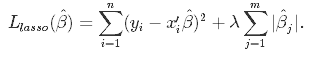

With lambda set to zero, you will find that this is the equivalent of the linear regression model with least sqaure loss. Thus lasso regression shrinks the coefficients and helps to reduce the model complexity and multi-collinearity.

lambda can be any real-valued number between zero and infinity; the larger the value, the more aggressive the penalization is. To read more visit https://www.datacamp.com/tutorial/tutorial-lasso-ridge-regression

**Side Notes: Social Fairness**:


In real world machine learning deployments it is observed that the standard al
gorithm results in a model which incurs higher cost for females compared to males. Similarly it is even more noticeable among the sensitive (or protected) attribute like racial groups which can take more than two values. In light of this consideration, recent works consider a different objective. Rather than minimizing the cost over the entire dataset, the objective of socially fair model is to find a model that minimizes the average cost across different (protected) groups.

So, in simple words, if your model has loss on males nearly same as loss incured on females then your model is socially fair to group (gender). Thus, you can check if your learned model (here regressor) obeys social fairness or not?

(To read more https://arxiv.org/pdf/2006.10085.pdf).


In [ ]:
#Thanks 

## DO PREPARE A SEPARATE REPORT (in PDF format) for all your observations in each question. You can report any other observations as well and use your creativity to understand the concepts.

In [ ]:
import statistics

In [ ]:
def gradients(X,y,y_hat,m):
  
  X=np.array(X)
  dw = (1/m)*np.dot(X.T,(y_hat-y))
  db = (1/m)*np.sum((y_hat-y))
  return dw, db

In [ ]:
def loss(y, y_hat):
  #loss = np.float128()
  
  loss = np.mean((y_hat-y)**2)
  #print(loss)
  return loss

In [ ]:
def normalisedata(x):
  mean = np.mean(x)
  sd2 = statistics.stdev(x)
  #print(mean)
  #print(sd2)
  x = (x-mean)/sd2
  return x

In [ ]:
def predict(X, w, b, degrees):
    
    # X --> Input.
    # w --> weights (parameter).
    # b --> bias (parameter).
    #degrees --> A list, We add X^(value) feature to the input
    #             where value is one of the values in the list.
    
    # Adding degrees to input X.
    x1 = x_transform(X, degrees,len(X))
    
    # Returning predictions.
    return np.dot(x1, w) + b

In [ ]:
def x_transform(X, m,n):
    
    # X --> Input.
    # degrees --> A list, We add X^(value) feature to the input
    #             where value is one of the values in the list.
    
    # making a copy of X.
  fj = []
  for j in range(n):
    fi =[]
    x=X[j]
    for i in range(m+1):
      fi.append(pow(x,i))
    fj.append(fi)
  return fj


In [ ]:
def train(X, y, bs, degrees,m, epochs, lr):
    
    # X --> Input.
    # y --> true/target value.
    # bs --> Batch Size.
    # epochs --> Number of iterations.
    # degrees --> A list, We add X^(value) feature to the input
    #             where value is one of the values in the list.
    # lr --> Learning rate.
    
    # Adding features to input X.
    x = x_transform(X, degrees,m)
    
    # m-> number of training examples
    # n-> number of features 
    
    n=degrees+1
    
    # Initializing weights and bias to zeros.
    w = np.zeros((degrees+1,1))
    b = 0
    
    # Reshaping y.
    y=np.array(y)
    y = y.reshape(m,1)
    
    # Empty list to store losses.
    losses = []
    
    # Training loop.
    for epoch in range(epochs):
        for i in range((m-1)//bs + 1):
            
            # Defining batches.
            start_i = i*bs
            end_i = start_i + bs
            xb = x[start_i:end_i]
            yb = y[start_i:end_i]
            
            # Calculating hypothesis
            y_hat = np.dot(xb, w) + b
            
            # Getting the gradients of loss w.r.t parameters.
            dw, db = gradients(xb, yb, y_hat,m)
            
            # Updating the parameters.
            w -= lr*dw
            b -= lr*db
        
        # Calculating loss and appending it in the list.
        l = loss(y, np.dot(x, w) + b)
        losses.append(l)
        
    # returning weights, bias and losses(List).
    return w, b, losses

In [ ]:
#x2 = np.arange(0,10,step = 0.5)
#x2 = np.random.random(20)*10
x3 = np.linspace(0,10,num=200)
fx3 = []
i = 1
for x in x3:
  noise  = np.random.normal(0,0.2)
  y3 = np.sin(x*np.pi/8) + x/(12*np.pi) + noise
  fx3.append(y3)
  print('i = ',i,' x = ',x, ', f(x) = ',y3)
  i+=1

i =  1  x =  0.0 , f(x) =  0.36724399565766225
i =  2  x =  0.05025125628140704 , f(x) =  0.03989554728095737
i =  3  x =  0.10050251256281408 , f(x) =  0.05641097978958306
i =  4  x =  0.15075376884422112 , f(x) =  -0.06366120424218995
i =  5  x =  0.20100502512562815 , f(x) =  0.194008217190959
i =  6  x =  0.2512562814070352 , f(x) =  -0.16783893288675944
i =  7  x =  0.30150753768844224 , f(x) =  0.248193467739326
i =  8  x =  0.35175879396984927 , f(x) =  0.029959268386160143
i =  9  x =  0.4020100502512563 , f(x) =  0.06876966979248894
i =  10  x =  0.45226130653266333 , f(x) =  -0.15275978238982477
i =  11  x =  0.5025125628140704 , f(x) =  -0.03260321556646953
i =  12  x =  0.5527638190954774 , f(x) =  -0.05879360741238729
i =  13  x =  0.6030150753768845 , f(x) =  0.11541848637600424
i =  14  x =  0.6532663316582915 , f(x) =  0.04989087638832285
i =  15  x =  0.7035175879396985 , f(x) =  0.08390124636705823
i =  16  x =  0.7537688442211056 , f(x) =  0.18901644577086046
i =  17

[[ 0.47081101]
 [-0.18951958]
 [-0.20182908]
 [-0.03678106]
 [-0.09881961]
 [ 0.02179052]]


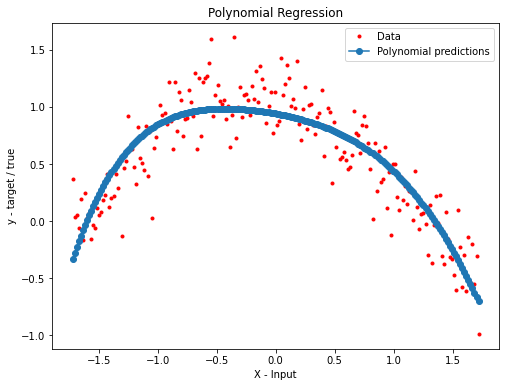

In [ ]:
x3 = normalisedata(x3)
w, b, l = train(x3, fx3, bs=100, degrees=5, m=200,epochs=1000, lr=0.01)
# Plotting
print(w)
fig = plt.figure(figsize=(8,6))
plt.plot(x3, fx3, 'r.')
plt.plot(x3, predict(x3, w, b, 5), '-o')
plt.legend(["Data", "Polynomial predictions"])
plt.xlabel('X - Input')
plt.ylabel('y - target / true')
plt.title('Polynomial Regression')
plt.show()